<a href="https://colab.research.google.com/github/Rahna10/Regression/blob/master/urban_sound_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#downloading and extracting the dataset on colab's server
import urllib.request
urllib.request.urlretrieve ("https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz","a.tar.gz")
import tarfile
tar = tarfile.open("a.tar.gz")
tar.extractall()
tar.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from librosa import display
import librosa

In [ ]:
#forming a panda dataframe from the metadata file
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
#head of the dataframe
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
#count of datapoints in each of the folders
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [ ]:

#feature set
#This file is of a dog bark
y,sr=librosa.load("UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40, 14), (40, 14), (40, 14), (40, 14), (40, 14))

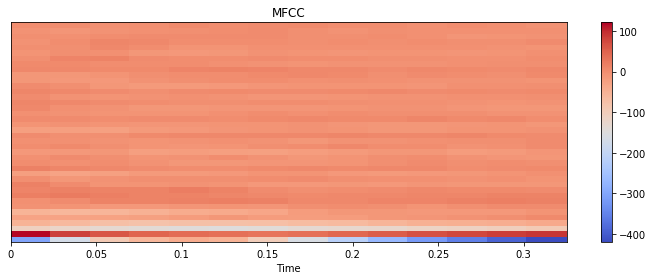

In [ ]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

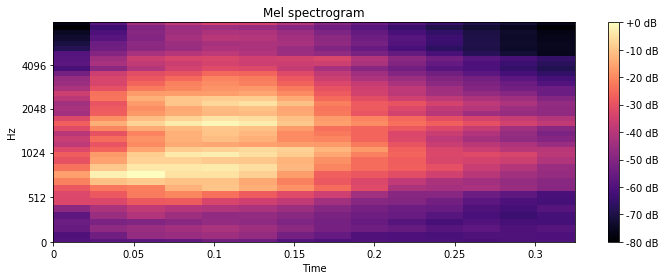

In [ ]:

#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

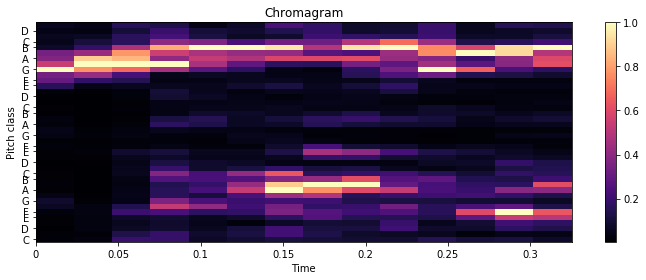

In [ ]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

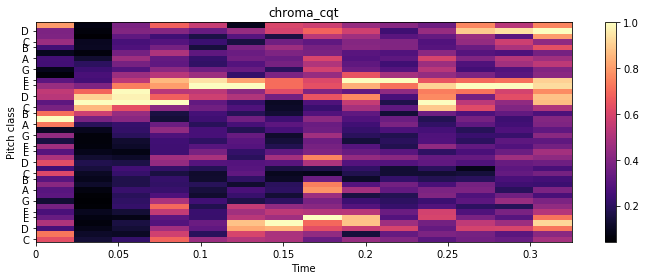

In [ ]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

In [ ]:
#feature set
y,sr=librosa.load("UrbanSound8K/audio/fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40,), (40,), (40,), (40,), (40,))

In [ ]:

#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape

(40, 5)

In [ ]:
#preprocessing using only mfcc
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)

100%|██████████| 8732/8732 [49:49<00:00,  3.60it/s]


In [ ]:
#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

len(x_train)+len(x_test)
len(data)
print(len)

In [ ]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
#x_train


((7895, 40, 5), (837, 40, 5), (7895,), (837,))

In [ ]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 200), (837, 200))

In [ ]:
#saving the data numpy arrays
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [ ]:
#downloading the saved data from colab's server
from google.colab import files

files.download("train_data.csv")
files.download("test_data.csv")
files.download("train_labels.csv")
files.download("test_labels.csv")

In [ ]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [ ]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape


1579000

In [ ]:

#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
#print('y_train shape=',y_train.shape)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [ ]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5))
x_train.shape,x_test.shape

((7895, 40, 5), (837, 40, 5))

In [ ]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 40,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5,1))
#shapes
x_train.shape,x_test.shape

((7895, 40, 5, 1), (837, 40, 5, 1))

In [ ]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
#forming model
model=Sequential()
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))


#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#training the model
history=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))



Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - 21s 3ms/step - loss: 2.0945 - acc: 0.2673 - val_loss: 1.5915 - val_acc: 0.4456
Epoch 2/30
7895/7895 [==============================] - 20s 3ms/step - loss: 1.4776 - acc: 0.4894 - val_loss: 1.2596 - val_acc: 0.6141
Epoch 3/30
7895/7895 [==============================] - 20s 3ms/step - loss: 1.1686 - acc: 0.6047 - val_loss: 1.0878 - val_acc: 0.6440
Epoch 4/30
7895/7895 [==============================] - 20s 3ms/step - loss: 0.9886 - acc: 0.6736 - val_loss: 1.2044 - val_acc: 0.5568
Epoch 5/30
7895/7895 [==============================] - 20s 3ms/step - loss: 0.8655 - acc: 0.7175 - val_loss: 1.0683 - val_acc: 0.6499
Epoch 6/30
7895/7895 [==============================] - 20s 3ms/step - loss: 0.8402 - acc: 0.7215 - val_loss: 1.1036 - val_acc: 0.6225
Epoch 7/30
7895/7895 [==============================] - 21s 3ms/step - loss: 0.7387 - acc: 0.7592 - val_loss: 0.9717 - val_acc: 0.6559
Epoch 8/

In [ ]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

837/837 [==============================] - 0s 434us/step
[0.09849490850694353, 0.9690943635212159]
[1.2016603245067197, 0.6810035842293907]


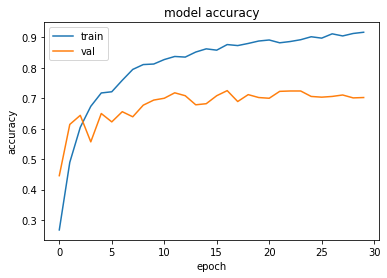

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

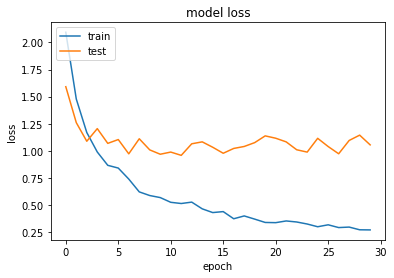

In [ ]:
import matplotlib.pyplot as plt
# list all data in history

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import load_model
import numpy as np
import wave

model = load_model('model.h5')

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

wav=wave.open('gun2.wav')
print('read')
y,sr=librosa.load('gun2.wav')
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))

features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape
x=np.array(features)
np.savetxt("test.csv",x,delimiter=",")
test = genfromtxt('test.csv', delimiter=',')

classes = model.predict_classes(test)

print ('classes')

read


ValueError: ignored